# Exploratory Data Analysis (EDA)

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
# Load the dataset
housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MHV'] = housing.target # median house value for California districts

print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
19220,2.3929,15.0,4.493797,1.007444,718.0,1.781638,38.46,-122.68,1.413
49,1.7750,40.0,2.687500,1.065341,700.0,1.988636,37.82,-122.27,1.125
6047,3.0375,42.0,5.652299,1.086207,1459.0,4.192529,34.03,-117.73,1.181
789,3.7895,29.0,5.323529,1.066176,1377.0,3.375000,37.63,-122.10,1.809
5841,3.0179,37.0,4.822222,1.050794,613.0,1.946032,34.19,-118.32,2.725


## Analysis

### Basic Statistics

In [ ]:
print("\nDataset Info:")
df.info() # wird genutzt, um sich schnell einen Überblick über die Datenstruktur und mögliche fehlende Werte zu verschaffen


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MHV         20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
print("\nDescriptive Statistics:")
df.describe() # wird genutzt, um die Verteilung und Streeung der Daten zu verstehen und Ausreißer zu erkennen


Descriptive Statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Missing Values

In [7]:
print("\nMissing Values per Column:")
df.isnull().sum()


Missing Values per Column:


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MHV           0
dtype: int64

In [8]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


---

Dealing with NAs:<br>
https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/

---

### Duplicate Entries

In [9]:
print("\nNumber of Duplicate Rows:")
df.duplicated().sum()


Number of Duplicate Rows:


np.int64(0)

### Plotting

In [10]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Get numerical columns (excluding the target 'MEDV' for now, but including it in the plots below)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

#### Univariate Analysis

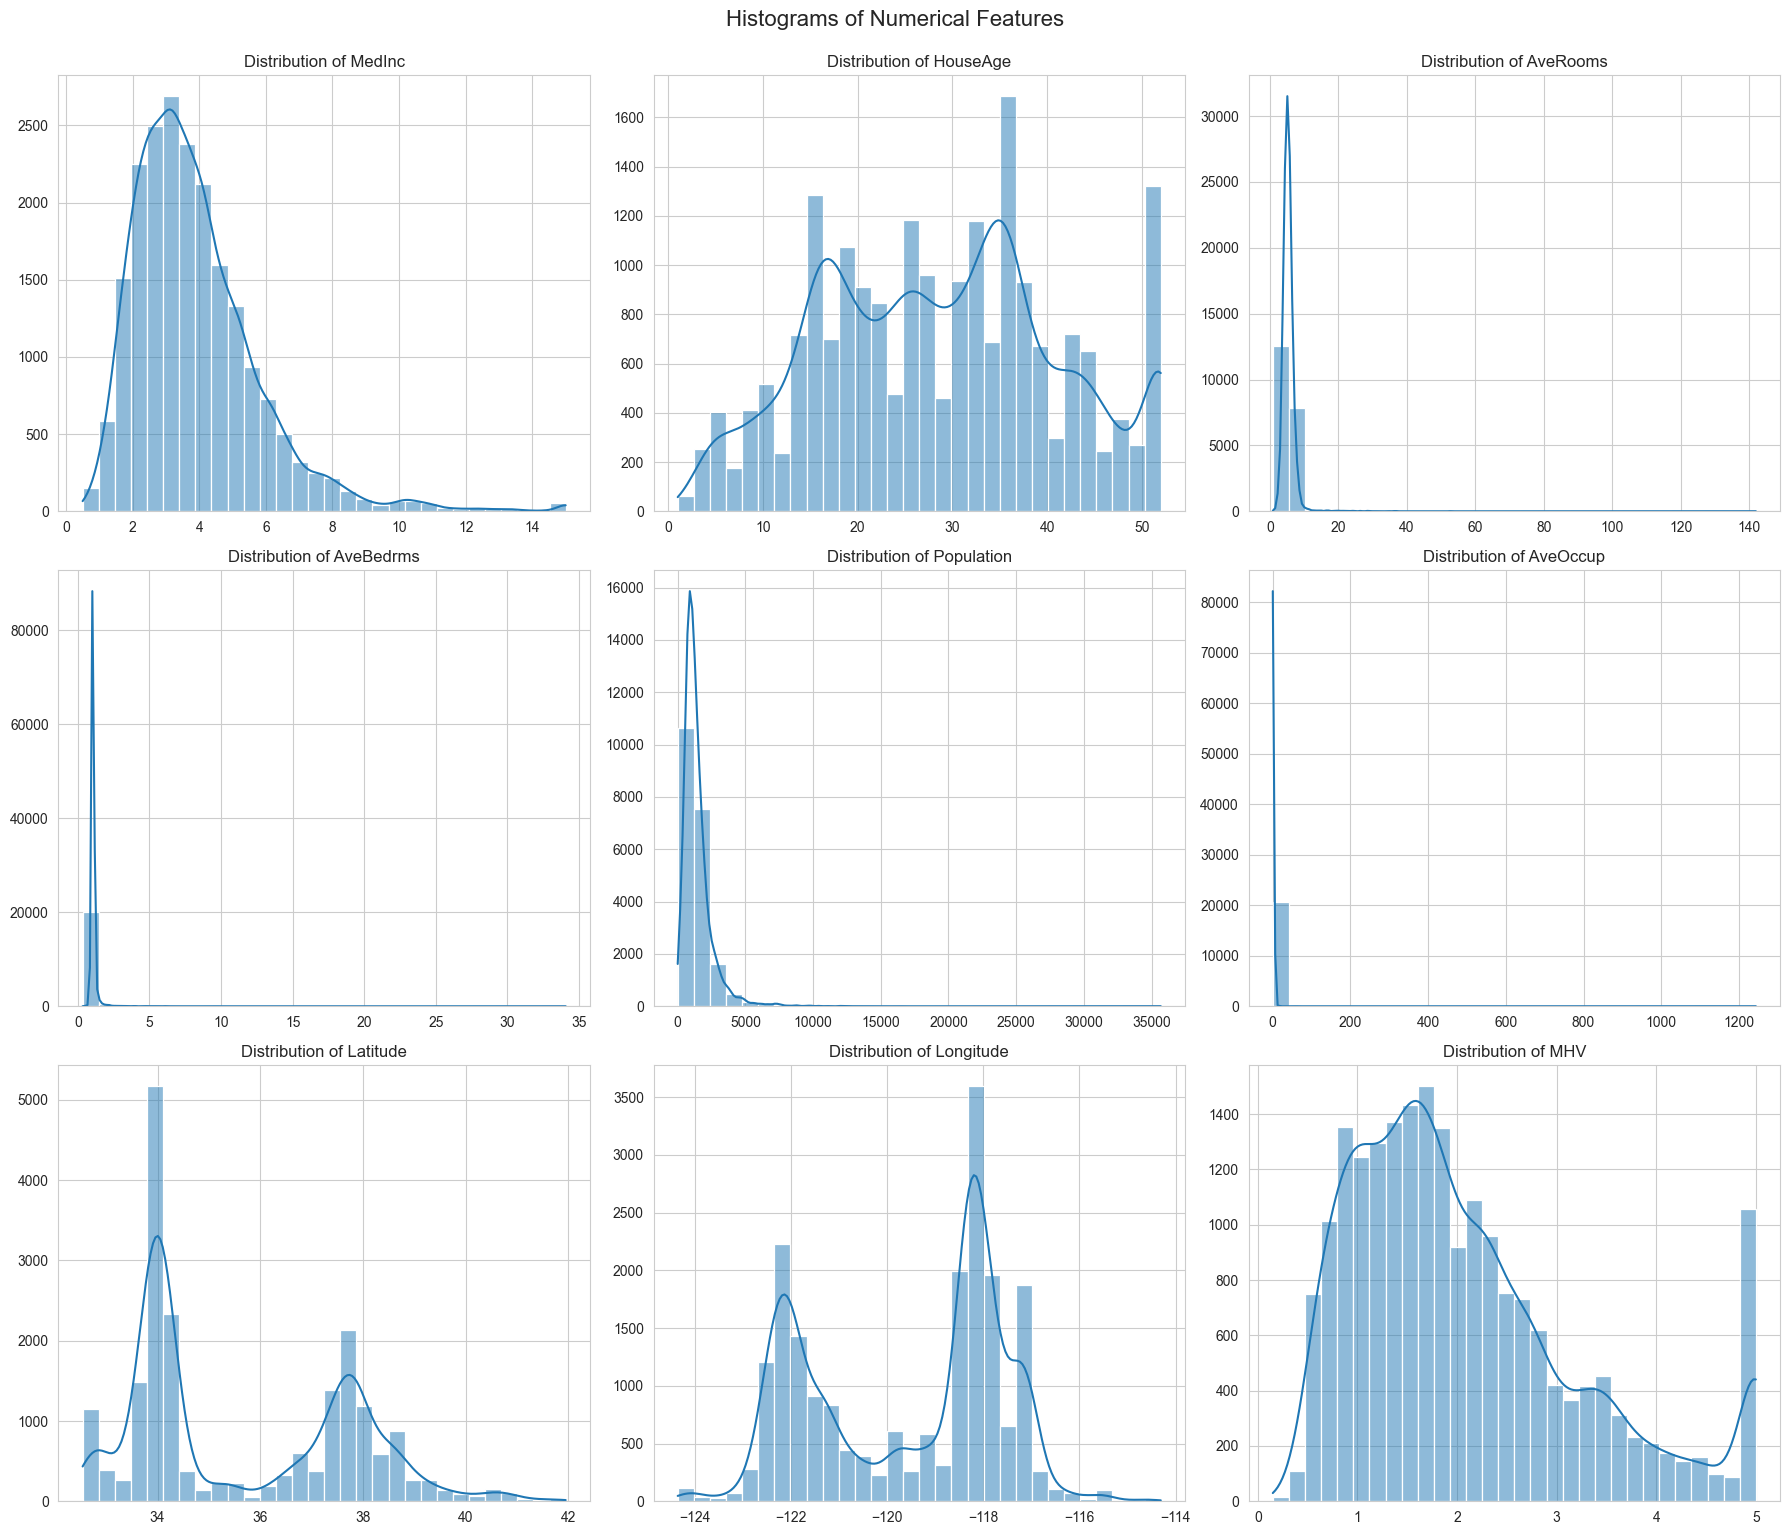

In [11]:
# Histograms (dient dazu, die Verteilung und Struktur eines Datensatzes sichtbar zu machen und auf einen Blick Muster, Schwerpunkte oder Auffälligkeiten zu erkennen, die in Rohdaten schwer zu sehen wären)

plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16)
plt.show()

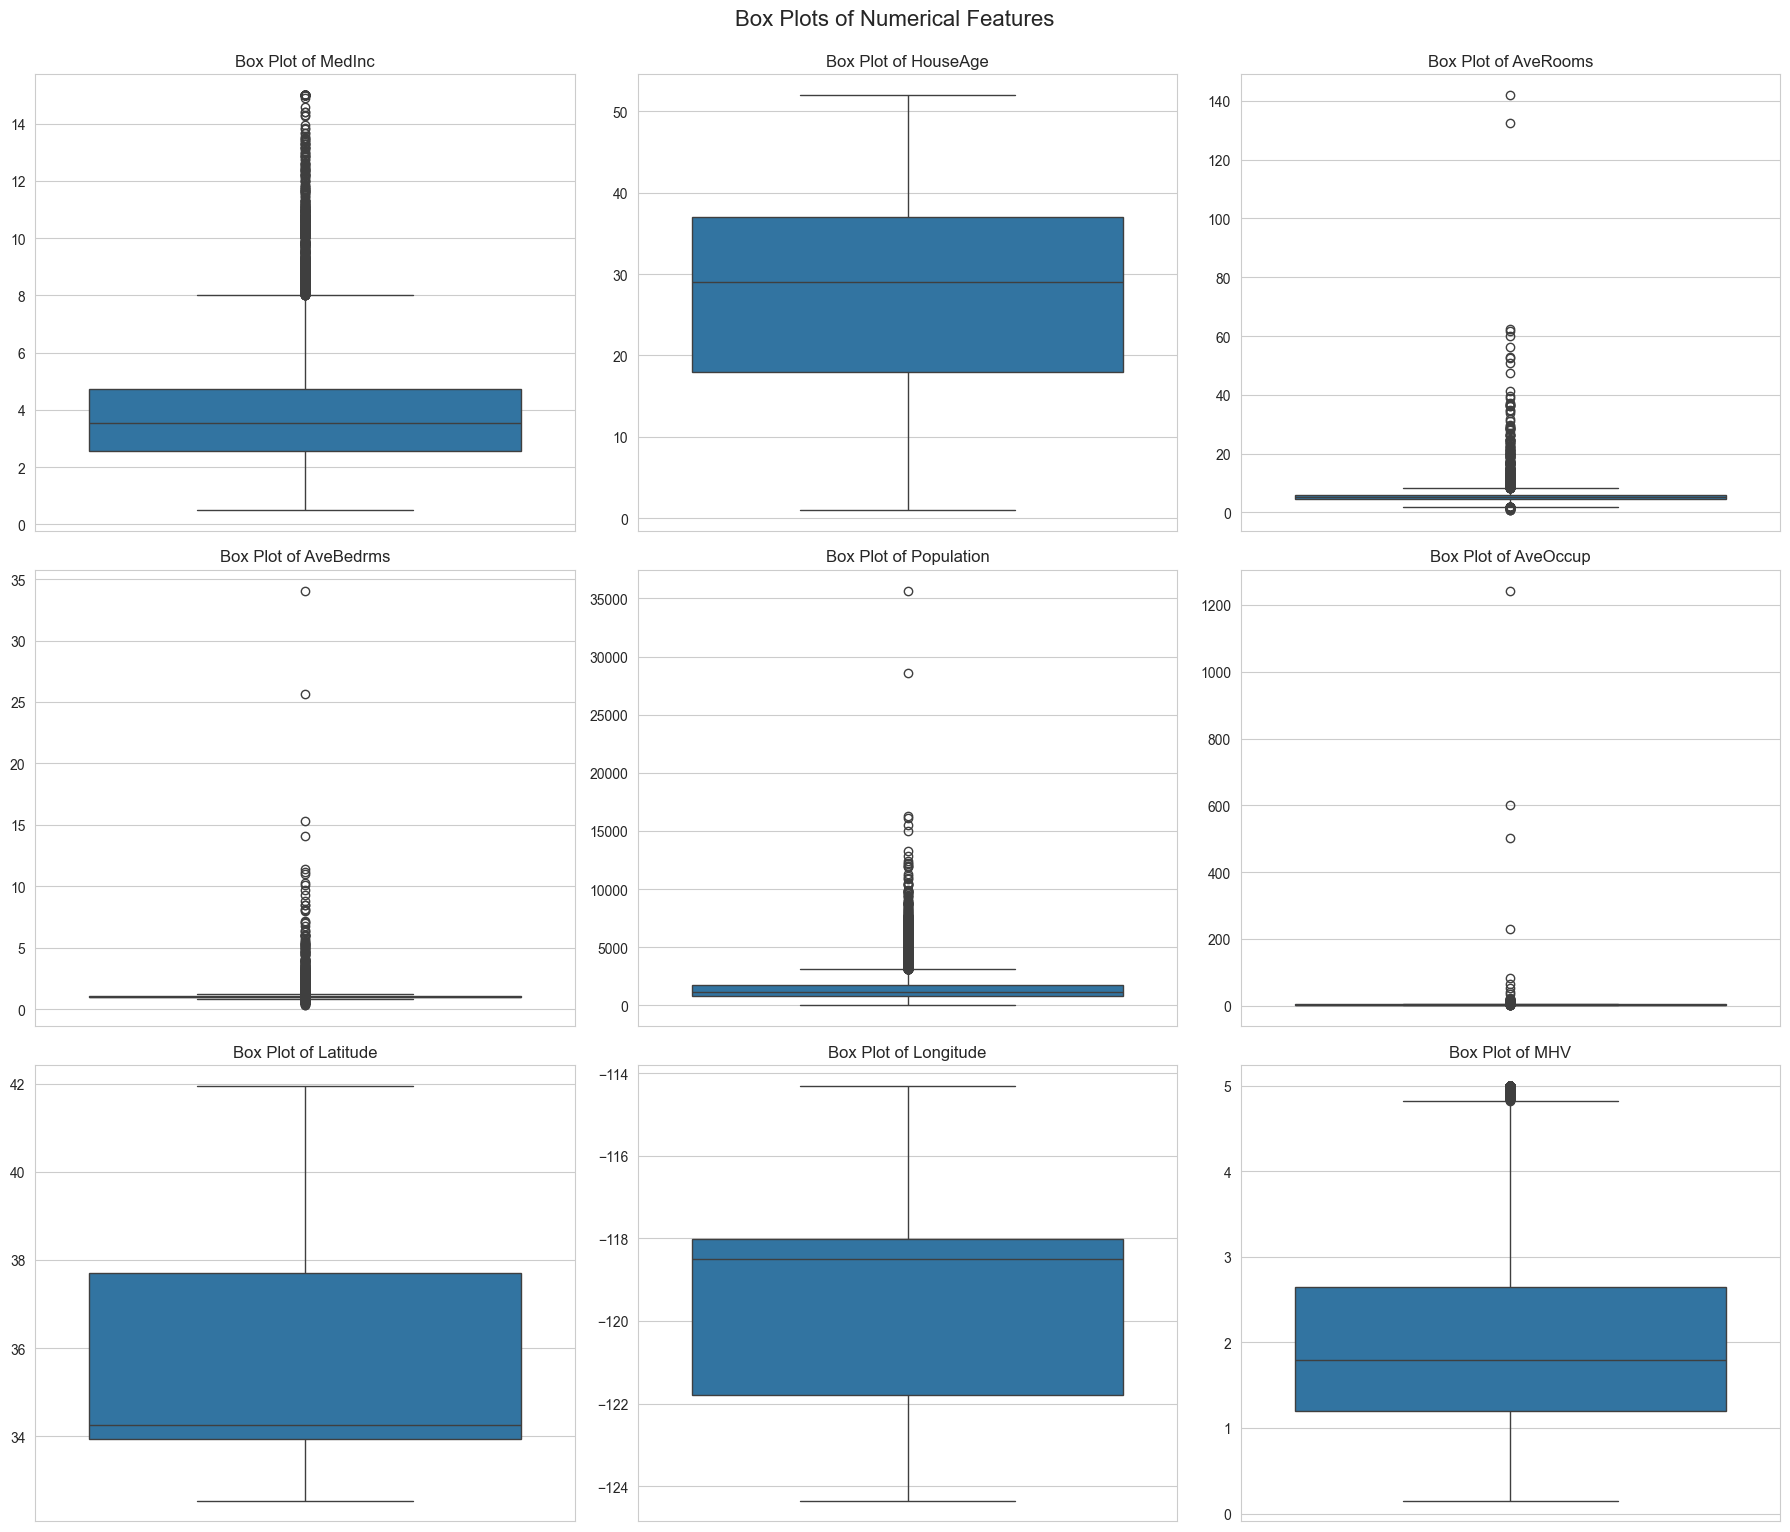

In [12]:
# Box Plots (dient dazu, die Verteilung, Streuung und zentrale Tendenz einer numerischen Datenmenge kompakt und anschaulich darzustellen. Visualisiert Minimum und Maximum)

plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.suptitle('Box Plots of Numerical Features', y=1.02, fontsize=16)
plt.show()

### Bivariate Analysis

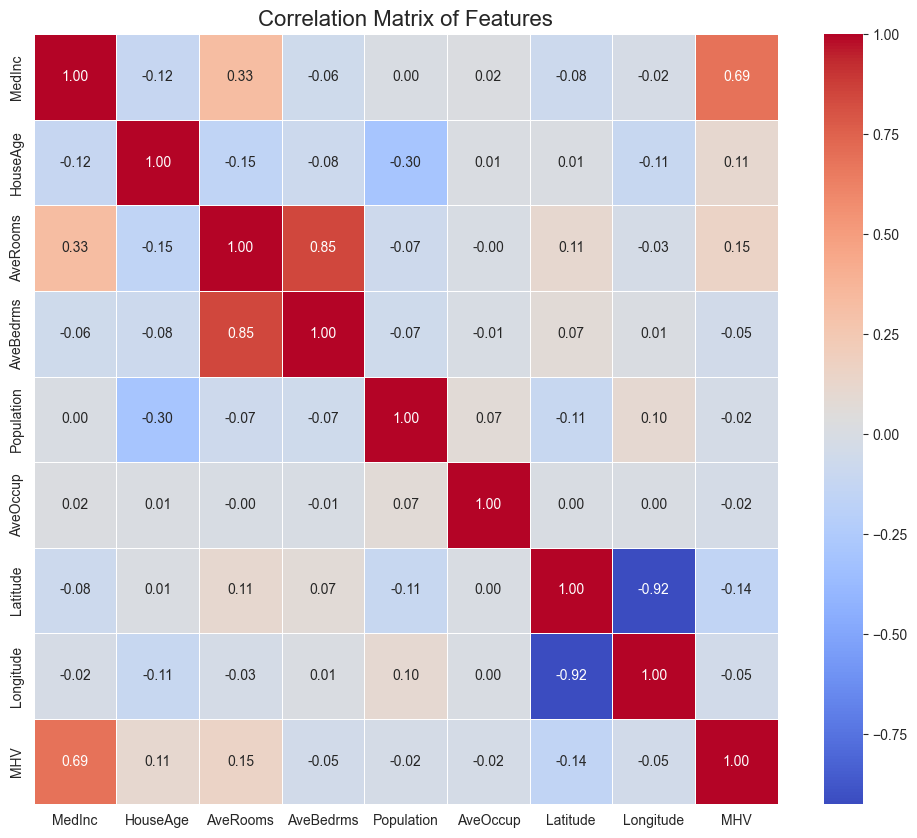

In [13]:
# Correlation Matrix

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

## Outlier Detection

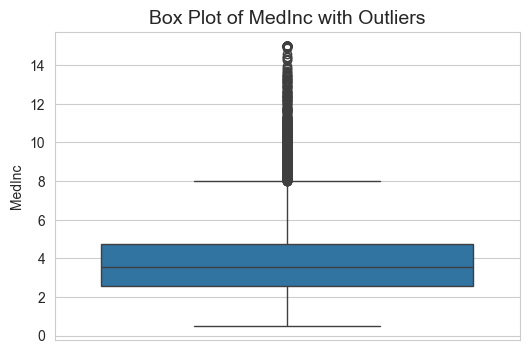

In [ ]:
target_column_for_outliers = "MedInc"

Q1 = df[target_column_for_outliers].quantile(0.25)
Q3 = df[target_column_for_outliers].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR #Standardformel mit der festgelegt wird, ab welchem Wert nach unten Daten als Ausreißer gelten
upper_bound = Q3 + 1.5 * IQR #Standardformel mit der festgelegt wird, ab welchem Wert nach oben Daten als Ausreißer gelten

outliers = df[
    (df[target_column_for_outliers] < lower_bound)
    | (df[target_column_for_outliers] > upper_bound)
]

# Visualize outliers using a box plot again
plt.figure(figsize=(6, 4))
sns.boxplot(y=df[target_column_for_outliers])
plt.title(f"Box Plot of {target_column_for_outliers} with Outliers", fontsize=14)
plt.show()

## Feature Engineering


DataFrame after Feature Engineering (added 'ROOM_PER_MedInc'):
   MedInc  AveRooms  ROOM_PER_MedInc    MHV
0  8.3252  6.984127         1.192017  4.526
1  8.3014  6.238137         1.330750  3.585
2  7.2574  8.288136         0.875637  3.521
3  5.6431  5.817352         0.970046  3.413
4  3.8462  6.281853         0.612271  3.422

Correlation of 'ROOM_PER_MedInc' with 'MHV': 0.67


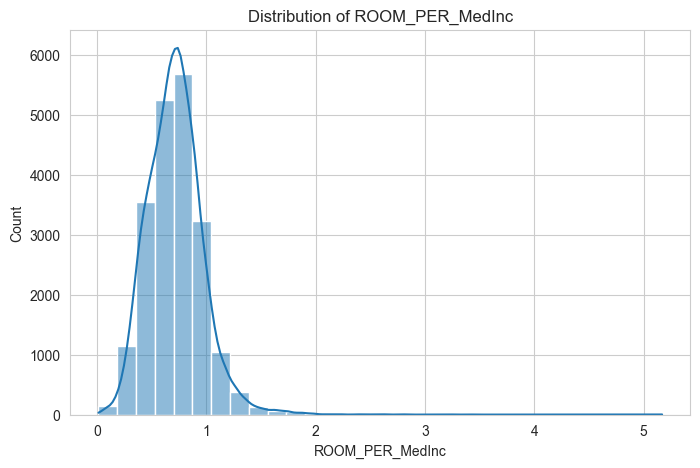

In [15]:
# feature engineering (Definition) = bezeichnet den Prozess, bei dem Rohdaten so umgewandelt, ausgewählt und erstellt werden, 
#___ dass sie als Merkmale (Features) für Machine-Learning-Modelle möglichst aussagekräftig und nützlich sind. 
#___ Ziel ist es, die Daten so aufzubereiten, dass ein Modell daraus bestmögliche Vorhersagen treffen kann

# Example: Create a new feature 'ROOM_PER_PERSON' (simplified)
# This could represent the density of rooms per lower status population or similar
if 'MedInc' in df.columns and 'AveRooms' in df.columns:
    df['ROOM_PER_MedInc'] = df['MedInc'] / (df['AveRooms'] + 1e-6) # Add small epsilon to avoid division by zero
    print("\nDataFrame after Feature Engineering (added 'ROOM_PER_MedInc'):")
    print(df[['MedInc', 'AveRooms', 'ROOM_PER_MedInc', 'MHV']].head())

    # Check correlation of new feature with target
    print(f"\nCorrelation of 'ROOM_PER_MedInc' with 'MHV': {df['ROOM_PER_MedInc'].corr(df['MHV']):.2f}")

    # Visualize the new feature's distribution
    plt.figure(figsize=(8, 5))
    sns.histplot(df['ROOM_PER_MedInc'], kde=True, bins=30)
    plt.title('Distribution of ROOM_PER_MedInc')
    plt.show()

# Introduction to Machine Learning

# Basic Concept
https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/

In [16]:
# Supervised Learning (we know the correct labels)
## features and labels
# Unsupervised Learning (we do not know the correct labels)

In [19]:
from sklearn.model_selection import train_test_split

# Prepare data for regression
X = df.drop(columns=["MHV"])
y = df['MHV']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score # misst den Anteil der korrekten Vorhersagen im Vergleich zu den tatsächlichen Werten

## Regression

In [20]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

Mean Squared Error: 0.53


## Classification

In [21]:
# read classification data

from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["type"] = iris.target

In [22]:
# Prepare data for regression
X = iris_df.drop(columns=["type"])
y = iris_df['type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train a K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_clf = knn_model.predict(X_test)


print(f"Accuracy Score: {accuracy_score(y_test, y_pred_clf):.2f}") #

Accuracy Score: 1.00


## Clustering

In [24]:
# Clustering (Definition) = Datenpunkte werden anhand ihrer Ähnlichkeit in Gruppen (Cluster) eingeteilt

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # n_init for modern sklearn
clusters = kmeans.fit_predict(X_train)

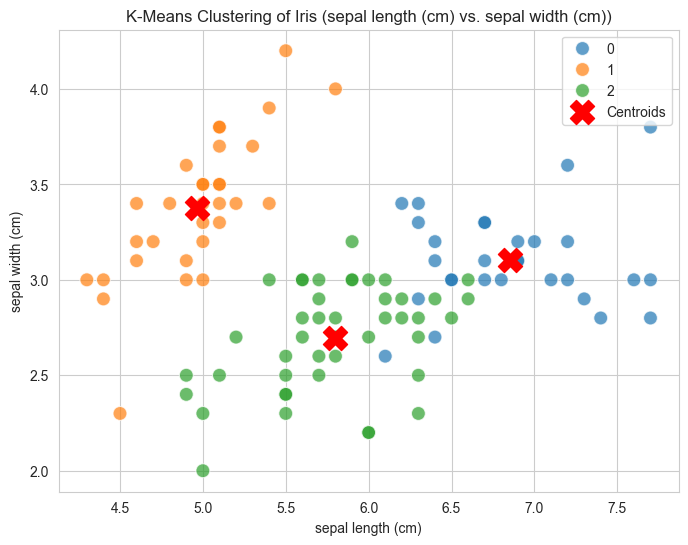

In [25]:
# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train['sepal length (cm)'], y=X_train['sepal width (cm)'], hue=clusters, palette='tab10', s=100, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering of Iris (sepal length (cm) vs. sepal width (cm))')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.grid(True)
plt.show()

# Read Data from API

Video: https://www.youtube.com/watch?v=-oPuGc05Lxs

In [ ]:
import requests
import json

# api uri
uri = "https://pokeapi.co/api/v2/pokemon?limit=100&offset=0"


num_requests=5 #wie oft die API abgefragt werden soll
limit_per_request=100 #wie viele Pokemon pro Anfrage abgerufen werden sollen

pokemon_results = [] #Leere Liste, in der alle Pokemon gespeichert werden
offset = 0 #Startpunkt für die nächste Anfrage

for i in range(num_requests):
    uri = f"https://pokeapi.co/api/v2/pokemon?limit={limit_per_request}&offset={offset}"
    print(f"Fetching data from: {uri}")
    try:
        response = requests.get(uri)
        response.raise_for_status()  # diese Zeile prüft, ob die HTTP-Anfrage erfolgreich war (Statuscode 200). Falls die Anfrage fehlschlägt, wird eine Exception ausgelöst
        data = response.json() #die Antwort der API wird als JSON eingelesen und in der Variable data gespeichert
        pokemon_results.extend(data['results']) #Aus dem geladenen JSON werden die Pokémon-Datensätze aus dem Schlüssel 'results' entnommen
        offset += limit_per_request #Der Offset wird um die Anzahl der pro Anfrage geladenen Pokémon erhöht.

    except requests.exceptions.RequestException as e: #Falls irgendwo im try-Block ein Fehler auftritt (z.B. keine Internetverbindung, Server antwortet nicht, ungültige URL), wird dieser Block ausgeführt.
        print(f"Error fetching data from {uri}: {e}")
        break # Die Schleife wird sofort abgebrochen, damit keine weiteren (fehlerhaften) Anfragen mehr gesendet werden.

# Speichern der Ergebnisse in eine JSON-Datei
output_filename = "all_pokemon_data.json"
with open(output_filename, 'w', encoding='utf-8') as f:
    json.dump(pokemon_results, f, indent=4)

Fetching data from: https://pokeapi.co/api/v2/pokemon?limit=100&offset=0
Fetching data from: https://pokeapi.co/api/v2/pokemon?limit=100&offset=100
Fetching data from: https://pokeapi.co/api/v2/pokemon?limit=100&offset=200
Fetching data from: https://pokeapi.co/api/v2/pokemon?limit=100&offset=300
Fetching data from: https://pokeapi.co/api/v2/pokemon?limit=100&offset=400
